# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [29]:
import sys
!{sys.executable} -m pip install citipy

In [30]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import requests
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [31]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 590


---

In [32]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"

weather_response = requests.get(query_url)
weather_json = weather_response.json()
print(f"The weather API responded with: {weather_json}.")
pretty_json = json.dumps(weather_json, indent=4)
print(pretty_json)

The weather API responded with: {'coord': {'lon': -154.9731, 'lat': 19.5933}, 'weather': [{'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50d'}], 'base': 'stations', 'main': {'temp': 25.26, 'feels_like': 26.17, 'temp_min': 23.83, 'temp_max': 25.41, 'pressure': 1019, 'humidity': 89}, 'visibility': 4828, 'wind': {'speed': 2.57, 'deg': 300}, 'clouds': {'all': 100}, 'dt': 1689885384, 'sys': {'type': 2, 'id': 2079676, 'country': 'US', 'sunrise': 1689868286, 'sunset': 1689915641}, 'timezone': -36000, 'id': 5855809, 'name': 'Hawaiian Paradise Park', 'cod': 200}.
{
    "coord": {
        "lon": -154.9731,
        "lat": 19.5933
    },
    "weather": [
        {
            "id": 701,
            "main": "Mist",
            "description": "mist",
            "icon": "50d"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 25.26,
        "feels_like": 26.17,
        "temp_min": 23.83,
        "temp_max": 25.41,
        "pressure": 1019,
        "humidity": 89
    

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [33]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | grytviken
Processing Record 2 of Set 1 | zapala
Processing Record 3 of Set 1 | edinburgh of the seven seas
Processing Record 4 of Set 1 | nova vicosa
Processing Record 5 of Set 1 | port saint john's
Processing Record 6 of Set 1 | stanley
Processing Record 7 of Set 1 | goz beida
Processing Record 8 of Set 1 | mazara del vallo
Processing Record 9 of Set 1 | dakhla
Processing Record 10 of Set 1 | port-aux-francais
Processing Record 11 of Set 1 | qaqortoq
Processing Record 12 of Set 1 | saipan
Processing Record 13 of Set 1 | daru
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | haiku-pauwela
Processing Record 16 of Set 1 | susuman
Processing Record 17 of Set 1 | san patricio
Processing Record 18 of Set 1 | gokwe
Processing Record 19 of Set 1 | adamstown
Processing Record 20 of Set 1 | waitangi
Processing Record 21 of Set 1 | tieli
Processing Record 22 of Set 1 | bilibino
Process

Processing Record 38 of Set 4 | visby
Processing Record 39 of Set 4 | gorgan
Processing Record 40 of Set 4 | zabaykal'sk
Processing Record 41 of Set 4 | tukrah
Processing Record 42 of Set 4 | palmeira
Processing Record 43 of Set 4 | sarangani
Processing Record 44 of Set 4 | bratsk
Processing Record 45 of Set 4 | hirara
Processing Record 46 of Set 4 | kirakira
Processing Record 47 of Set 4 | korla
Processing Record 48 of Set 4 | prince rupert
Processing Record 49 of Set 4 | doctor arroyo
Processing Record 0 of Set 5 | jiayuguan
Processing Record 1 of Set 5 | khorixas
Processing Record 2 of Set 5 | longyearbyen
Processing Record 3 of Set 5 | waddan
Processing Record 4 of Set 5 | weno
Processing Record 5 of Set 5 | rio grande
Processing Record 6 of Set 5 | iranshahr
Processing Record 7 of Set 5 | pariaman
Processing Record 8 of Set 5 | north bend
Processing Record 9 of Set 5 | vilyuysk
Processing Record 10 of Set 5 | tolanaro
Processing Record 11 of Set 5 | sisimiut
Processing Record 12 o

Processing Record 31 of Set 8 | ampere
Processing Record 32 of Set 8 | arar
Processing Record 33 of Set 8 | touros
Processing Record 34 of Set 8 | pervomayskoye
Processing Record 35 of Set 8 | ulricehamn
Processing Record 36 of Set 8 | usogorsk
Processing Record 37 of Set 8 | gadzhiyevo
Processing Record 38 of Set 8 | bel ombre
Processing Record 39 of Set 8 | tamanrasset
Processing Record 40 of Set 8 | yantongshan
Processing Record 41 of Set 8 | nar'yan-mar
Processing Record 42 of Set 8 | luderitz
Processing Record 43 of Set 8 | at taraf
Processing Record 44 of Set 8 | ghanzi
Processing Record 45 of Set 8 | merano
Processing Record 46 of Set 8 | covasna
Processing Record 47 of Set 8 | lockhart
Processing Record 48 of Set 8 | tsiombe
Processing Record 49 of Set 8 | lycksele
Processing Record 0 of Set 9 | independence
Processing Record 1 of Set 9 | lavrio
Processing Record 2 of Set 9 | jind
Processing Record 3 of Set 9 | alindao
Processing Record 4 of Set 9 | cargados carajos
City not fo

Processing Record 27 of Set 12 | hun
Processing Record 28 of Set 12 | felipe carrillo puerto
Processing Record 29 of Set 12 | canico
Processing Record 30 of Set 12 | minas de marcona
Processing Record 31 of Set 12 | birao
Processing Record 32 of Set 12 | merignac
Processing Record 33 of Set 12 | puerto el triunfo
Processing Record 34 of Set 12 | ambovombe
Processing Record 35 of Set 12 | andergrove
Processing Record 36 of Set 12 | buka
Processing Record 37 of Set 12 | kayes
Processing Record 38 of Set 12 | kununurra
Processing Record 39 of Set 12 | palmer
-----------------------------
Data Retrieval Complete      
-----------------------------


In [34]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          567
Lat           567
Lng           567
Max Temp      567
Humidity      567
Cloudiness    567
Wind Speed    567
Country       567
Date          567
dtype: int64

In [35]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,grytviken,-54.2811,-36.5092,-2.70,86,97,1.75,GS,1689885386
1,zapala,-38.8992,-70.0544,11.38,46,63,11.69,AR,1689885303
2,edinburgh of the seven seas,-37.0676,-12.3116,11.74,59,24,9.96,SH,1689885386
3,nova vicosa,-17.8919,-39.3719,22.61,86,100,7.03,BR,1689885099
4,port saint john's,-31.6229,29.5448,13.43,60,87,2.16,ZA,1689885386


In [40]:
import os

# Export the City_Data into a csv
output_directory = "output_data"
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

csv_file_path = os.path.join(output_directory, "cities.csv")
city_data_df.to_csv(csv_file_path, index_label="City_ID")

# Show Record Count
city_data_df.count()

City          567
Lat           567
Lng           567
Max Temp      567
Humidity      567
Cloudiness    567
Wind Speed    567
Country       561
Date          567
dtype: int64

In [41]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,-2.70,86,97,1.75,GS,1689885386
1,zapala,-38.8992,-70.0544,11.38,46,63,11.69,AR,1689885303
2,edinburgh of the seven seas,-37.0676,-12.3116,11.74,59,24,9.96,SH,1689885386
3,nova vicosa,-17.8919,-39.3719,22.61,86,100,7.03,BR,1689885099
4,port saint john's,-31.6229,29.5448,13.43,60,87,2.16,ZA,1689885386


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

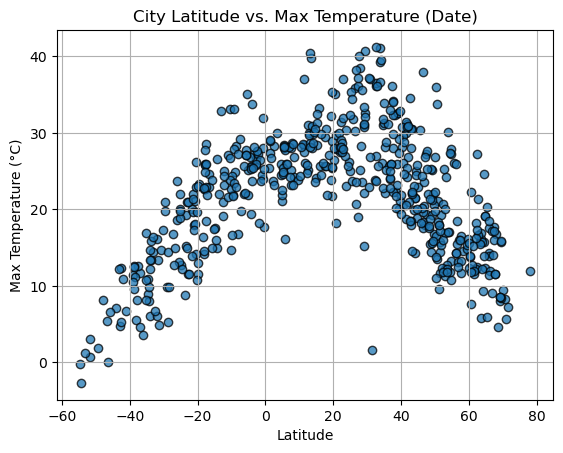

In [42]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (Date)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

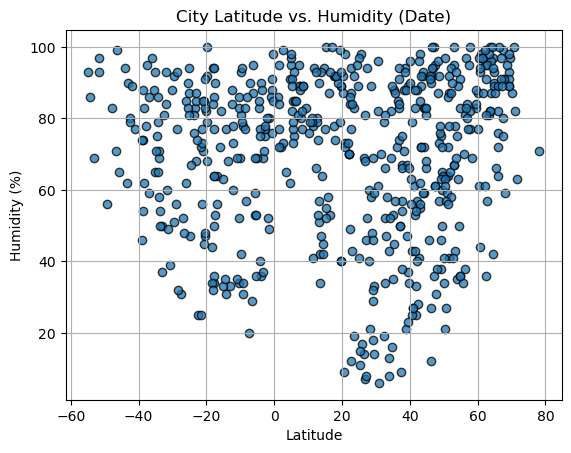

In [43]:
# Build scatter plot for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (Date)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()


#### Latitude Vs. Cloudiness

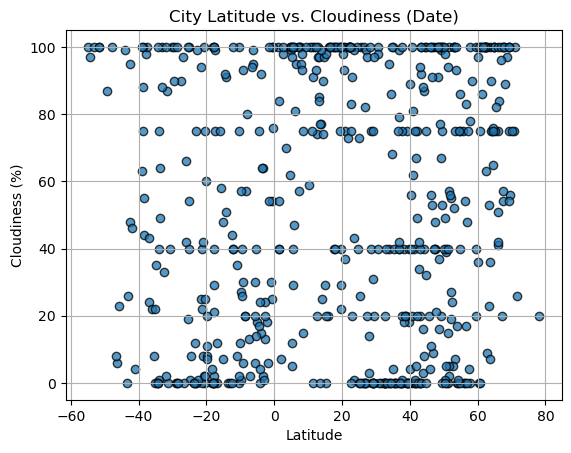

In [44]:
# Build scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (Date)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()


#### Latitude vs. Wind Speed Plot

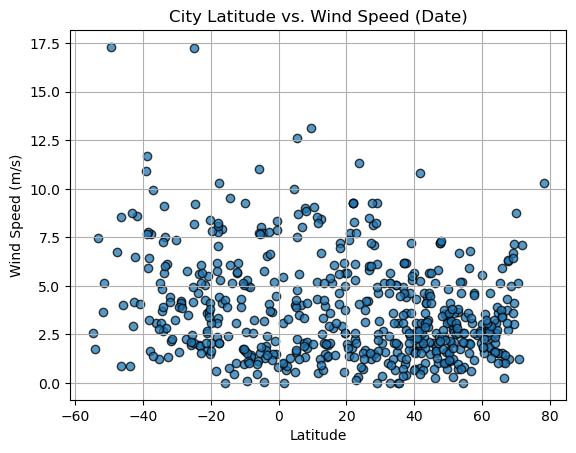

In [45]:
# Build scatter plot for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (Date)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [48]:
# Define a function to create Linear Regression plots

def plot_linear_regression(x_values, y_values, x_label, y_label, title, filename):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

    # Calculate regression line
    regression_line = x_values * slope + intercept

    # Create scatter plot
    plt.scatter(x_values, y_values, edgecolor="black", alpha=0.75)

    # Plot the regression line
    plt.plot(x_values, regression_line, "r-", label="Regression Line")

    # Incorporate other graph properties
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)
    plt.legend()

    # Save the figure
    plt.savefig(filename)

    # Show plot
    plt.show()


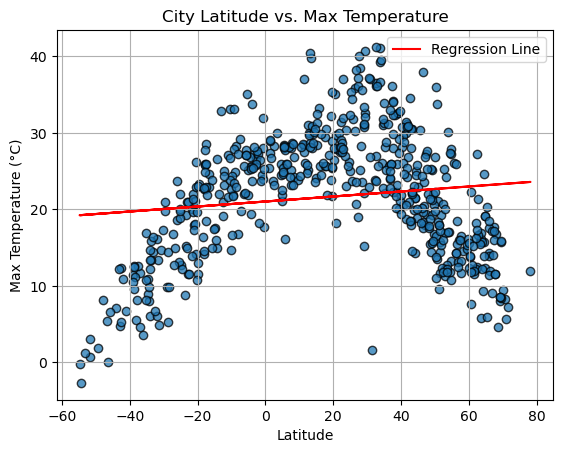

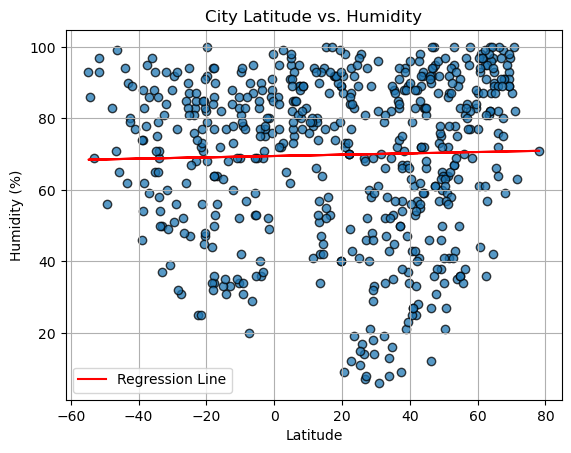

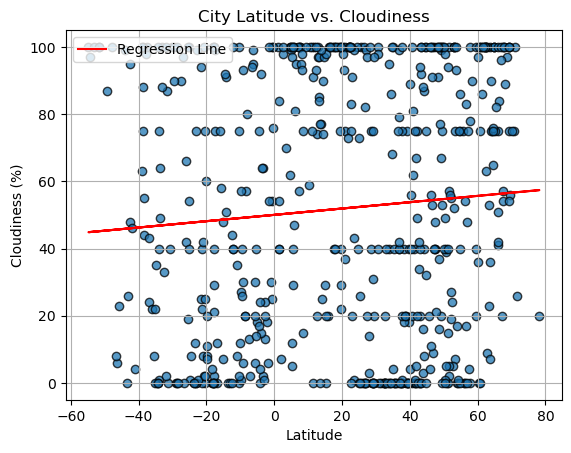

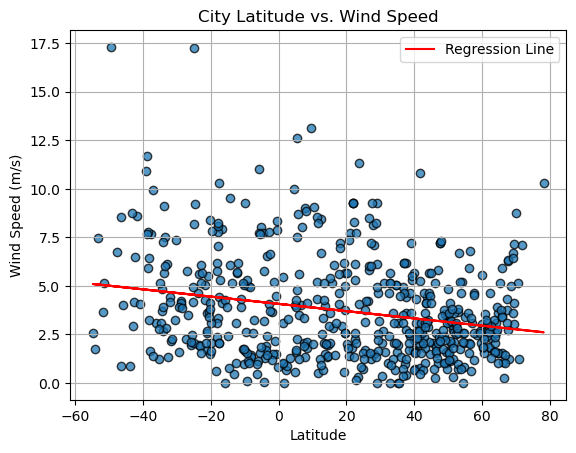

In [49]:
# usage for latitude vs. temperature
plot_linear_regression(city_data_df["Lat"], city_data_df["Max Temp"], "Latitude", "Max Temperature (°C)", "City Latitude vs. Max Temperature", "output_data/Regression_Latitude_vs_MaxTemp.png")

#usage for latitude vs. humidity
plot_linear_regression(city_data_df["Lat"], city_data_df["Humidity"], "Latitude", "Humidity (%)", "City Latitude vs. Humidity", "output_data/Regression_Latitude_vs_Humidity.png")

#usage for latitude vs. cloudiness
plot_linear_regression(city_data_df["Lat"], city_data_df["Cloudiness"], "Latitude", "Cloudiness (%)", "City Latitude vs. Cloudiness", "output_data/Regression_Latitude_vs_Cloudiness.png")

#usage for latitude vs. wind speed
plot_linear_regression(city_data_df["Lat"], city_data_df["Wind Speed"], "Latitude", "Wind Speed (m/s)", "City Latitude vs. Wind Speed", "output_data/Regression_Latitude_vs_WindSpeed.png")


In [50]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# Filter the DataFrame for Northern Hemisphere data
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()


# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,stanley,54.8680,-1.6985,13.21,91,86,3.42,GB,1689885129
6,goz beida,13.9500,20.5500,29.82,47,77,2.03,TD,1689885386
7,mazara del vallo,37.6641,12.5880,27.97,67,0,4.43,IT,1689885387
8,dakhla,23.6848,-15.9580,23.01,83,1,11.32,EH,1689885387
10,qaqortoq,60.7167,-46.0333,7.60,93,100,2.62,GL,1689884957


In [51]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# Filter the DataFrame for Southern Hemisphere data
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]


# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,-2.70,86,97,1.75,GS,1689885386
1,zapala,-38.8992,-70.0544,11.38,46,63,11.69,AR,1689885303
2,edinburgh of the seven seas,-37.0676,-12.3116,11.74,59,24,9.96,SH,1689885386
3,nova vicosa,-17.8919,-39.3719,22.61,86,100,7.03,BR,1689885099
4,port saint john's,-31.6229,29.5448,13.43,60,87,2.16,ZA,1689885386


###  Temperature vs. Latitude Linear Regression Plot

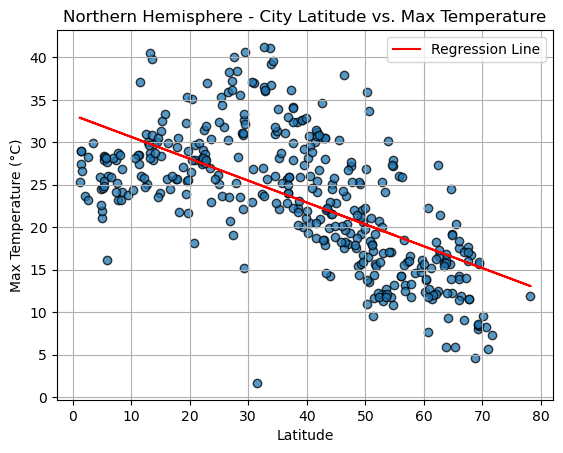

In [60]:
# Linear regression on Northern Hemisphere
# Linear regression on Northern Hemisphere for latitude vs. max temperature
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Latitude", "Max Temperature (°C)", "Northern Hemisphere - City Latitude vs. Max Temperature", "output_data/Regression_NorthernHemi_Latitude_vs_MaxTemp.png")



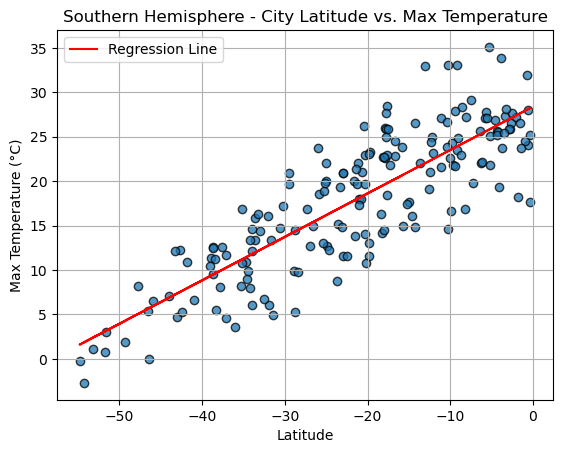

In [61]:
# Linear regression on Southern Hemisphere
# Linear regression on Southern Hemisphere for latitude vs. max temperature
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Latitude", "Max Temperature (°C)", "Southern Hemisphere - City Latitude vs. Max Temperature", "output_data/Regression_SouthernHemi_Latitude_vs_MaxTemp.png")



**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

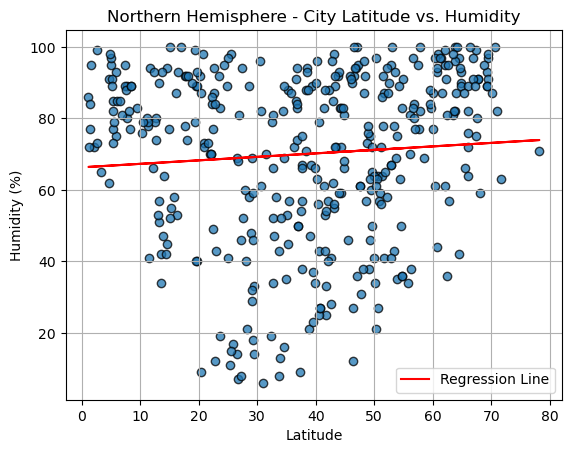

In [54]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere for latitude vs. humidity
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Latitude", "Humidity (%)", "Northern Hemisphere - City Latitude vs. Humidity", "output_data/Regression_NorthernHemi_Latitude_vs_Humidity.png")


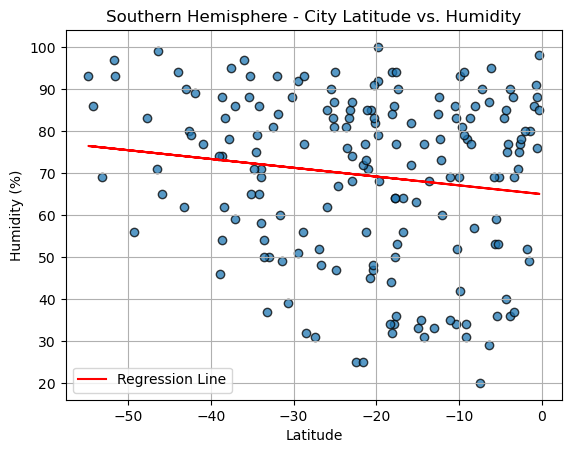

In [55]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere for latitude vs. humidity
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Latitude", "Humidity (%)", "Southern Hemisphere - City Latitude vs. Humidity", "output_data/Regression_SouthernHemi_Latitude_vs_Humidity.png")


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

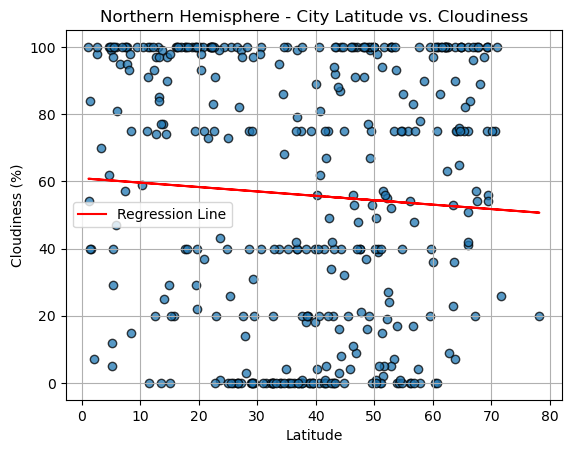

In [56]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere for latitude vs. cloudiness
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Latitude", "Cloudiness (%)", "Northern Hemisphere - City Latitude vs. Cloudiness", "output_data/Regression_NorthernHemi_Latitude_vs_Cloudiness.png")


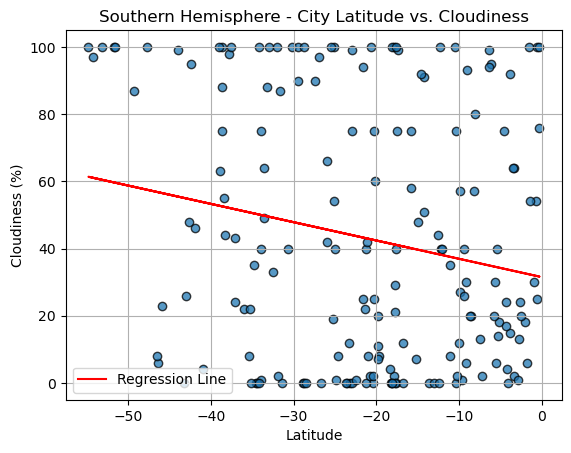

In [57]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere for latitude vs. cloudiness
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Latitude", "Cloudiness (%)", "Southern Hemisphere - City Latitude vs. Cloudiness", "output_data/Regression_SouthernHemi_Latitude_vs_Cloudiness.png")


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

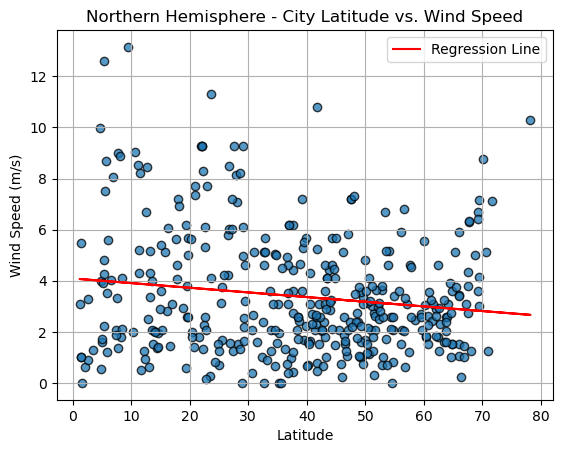

In [58]:
# Northern Hemisphere

# Linear regression on Northern Hemisphere for latitude vs. wind speed
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Latitude", "Wind Speed (m/s)", "Northern Hemisphere - City Latitude vs. Wind Speed", "output_data/Regression_NorthernHemi_Latitude_vs_WindSpeed.png")


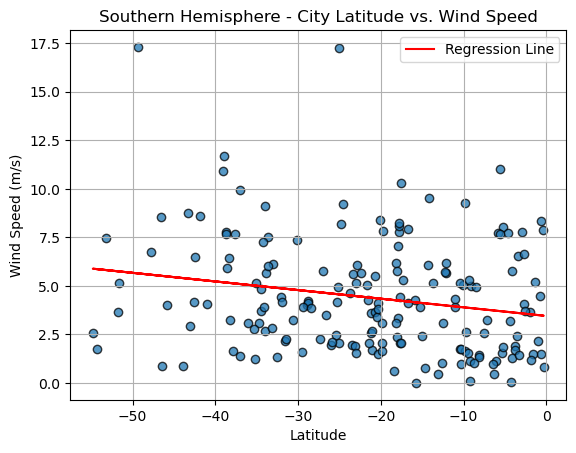

In [59]:
# Southern Hemisphere

# Linear regression on Southern Hemisphere for latitude vs. wind speed
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Latitude", "Wind Speed (m/s)", "Southern Hemisphere - City Latitude vs. Wind Speed", "output_data/Regression_SouthernHemi_Latitude_vs_WindSpeed.png")


**Discussion about the linear relationship:** YOUR RESPONSE HERE